In [126]:

import nltk
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
import numpy as np

In [127]:
def resolve_model_coherence_and_perplexity(nb: int, texts: list):
  id2word = Dictionary(texts)
  corpus = [id2word.doc2bow(text) for text in texts]

  # Train the lda model on the corpus.
  lda = LdaModel(corpus, num_topics=nb)

  # Compute Perplexity
  perplexity_lda=lda.log_perplexity(corpus)  # a measure of how good the model is (lower the better).
  #print('Perplexity= ', perplexity_lda)

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  return perplexity_lda ,coherence_lda



In [128]:

def load_texts(name: str, remove_stop_words=True):
    texts=[]
    file = open(name, "r")

    lines = file.readlines()
    file.close()

    stwrds = stopwords.words()
    # print(stwrds)

    for line in lines:
        line=line.strip()
        lt=line.split(",")
        # Potential ill-character cleaning
        for i in range(len(lt)):
            lt[i]=lt[i].replace('[','')
            lt[i]=lt[i].replace(']','')
            lt[i]=lt[i].replace('"','')
            lt[i]=lt[i].replace('\n','')
            lt[i]=lt[i].replace(' ', '')
        #End : Potential ill-characters cleaning
        # print(lt)
        if remove_stop_words:
            ltc=[word for word in lt if not word in stwrds]
            texts.append(ltc)
        else:
            texts.append(lt)
    return texts

In [129]:
import matplotlib.pyplot as plt

def plot_diff_nb(ls: list[tuple[int,float, float]], image_name: str):
    nb_array=np.array(ls)
    fig, axs= plt.subplots(1,2)

    axs[0].plot(nb_array[:,0],nb_array[:,1])
    axs[0].set_title('Perplexity')
    axs[1].plot(nb_array[:,0],nb_array[:,2])
    axs[1].set_title('Coherence')
    plt.savefig(image_name)
    plt.show()

In [130]:

#2d

texts=load_texts('TokenVieuxM.txt')
nb_coh = []
for nb in range(5,21):
  nb_coh.append((nb,*resolve_model_coherence_and_perplexity(nb, texts)))


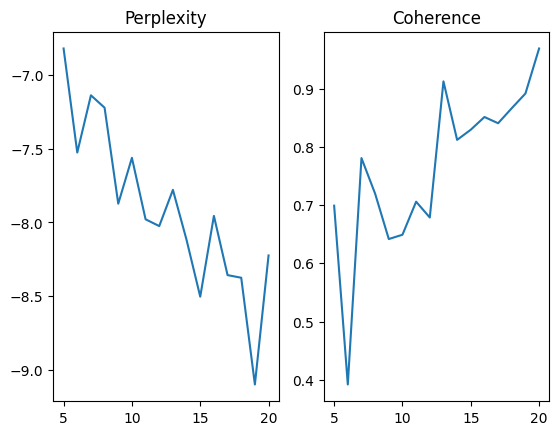

In [131]:
plot_diff_nb(nb_coh, 'coherence_values_per_nb_m_image.png')

In [132]:

## 2e

texts=load_texts('TokenVieuxN.txt', remove_stop_words=False)
resolve_model_coherence_and_perplexity(10,texts)

(-7.497226530948455, 0.31206784347388106)

In [133]:
texts=load_texts('TokenVieuxN.txt', remove_stop_words=True)
resolve_model_coherence_and_perplexity(10,texts)

(-7.717996648117085, 0.5012499613881881)

In [134]:
## 2f
texts=load_texts('TokenVieuxN.txt', remove_stop_words=True)
nb_coh = []
for nb in range(5,31):
  nb_coh.append((nb,*resolve_model_coherence_and_perplexity(nb, texts)))

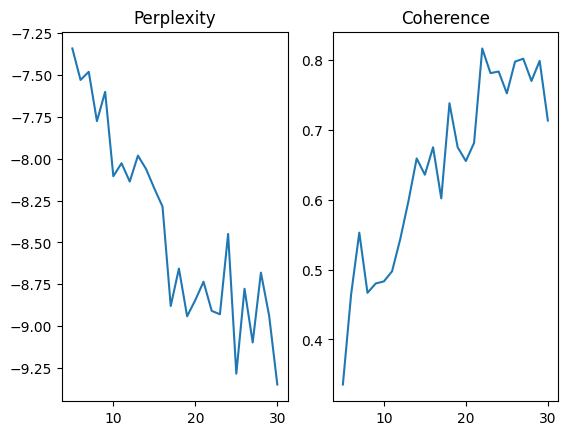

In [135]:

plot_diff_nb(nb_coh, 'coherence_values_per_nb_n_image.png')